<a href="https://colab.research.google.com/github/NiyenGreen/NiyenGreen/blob/main/LE1_Lugatic_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
pip install ucimlrepo

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import urllib.request
from sklearn.model_selection import train_test_split

from ucimlrepo import fetch_ucirepo

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
, delim_whitespace=True, header=None, na_values="?")
df.columns = ['displacement', 'mpg', 'cylinders', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df.drop(['car_name'], axis=1, inplace=True)
df.head()

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   mpg           398 non-null    int64  
 2   cylinders     398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
df.describe()

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
df.corr()

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin
displacement,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
mpg,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
cylinders,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


In [8]:
df.loc[df.duplicated()] ## Look for duplicates

,displacement,mpg,cylinders,horsepower,weight,acceleration,model_year,origin


In [12]:
df.fillna(df.mean(), inplace=True) ## Fill in missing values with mean
df.isna().sum() ## Look for missing values

displacement    0
mpg             0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

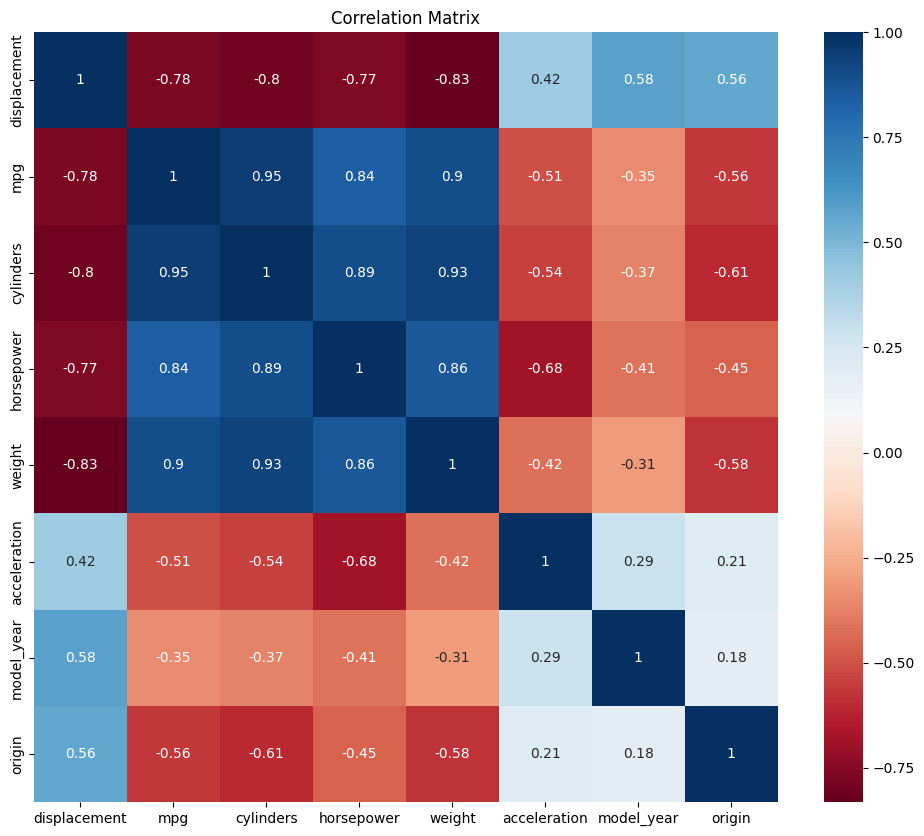

In [20]:
## Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlation Matrix")
plt.show()

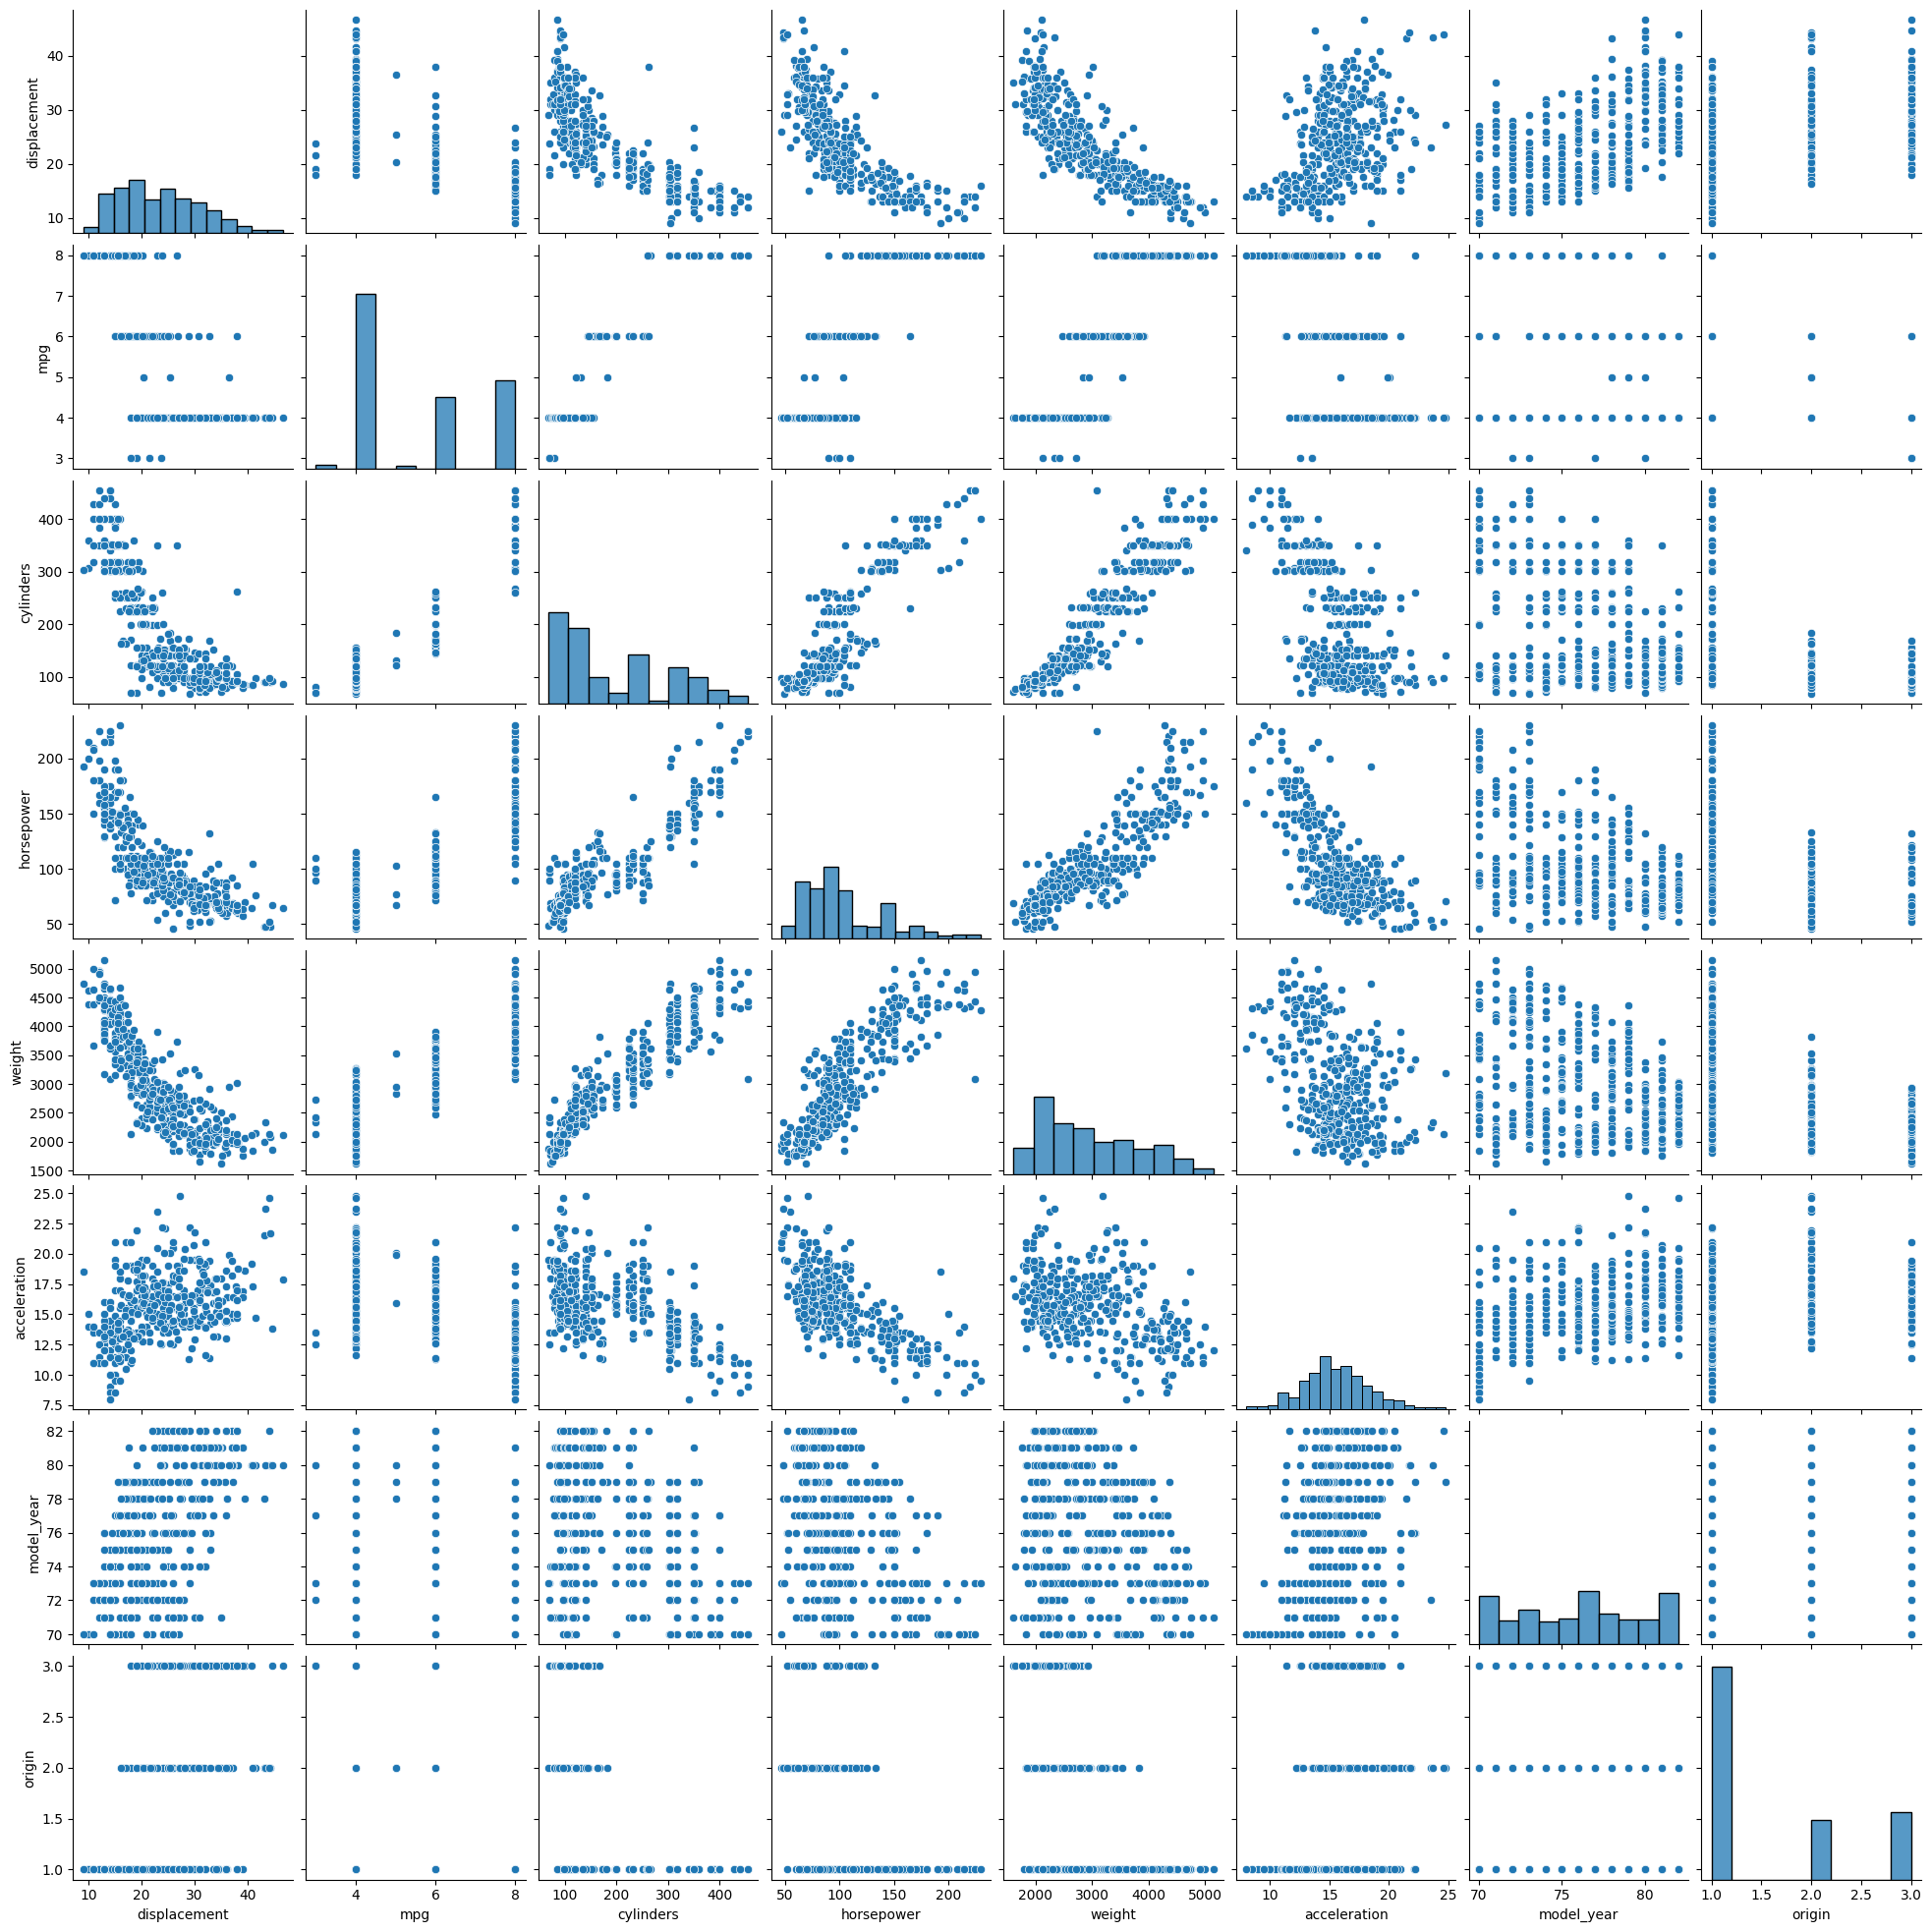

In [16]:
sns.pairplot(df)

In [29]:
X = df.drop(columns=['mpg'])
y = df['mpg']

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# **LINEAR REGRESSION**

In [30]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)

## check the coeff and y intercept
lr.coef_

array([-0.0107936 ,  0.0158191 , -0.00509378,  0.00011712, -0.01853897,
        0.00658128,  0.06193391])

In [72]:
lr.intercept_

2.535423359003211

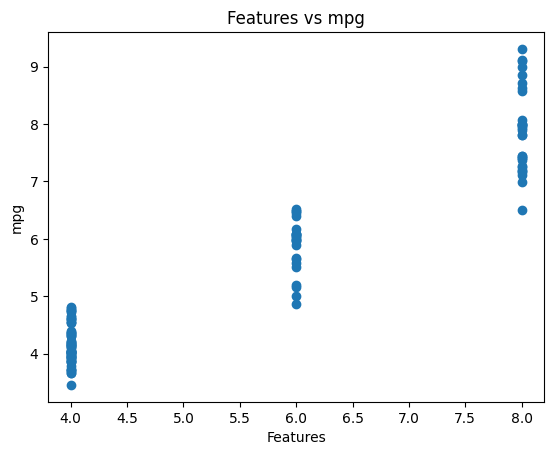

In [67]:
predictions = lr.predict(X_test);
plt.scatter(y_test,predictions)
plt.xlabel('Features')
plt.ylabel('mpg')
plt.title("Features vs mpg")
plt.show()

# **METRICS**

In [73]:
from sklearn.metrics import r2_score
from sklearn import metrics

r2 = r2_score(y_test,predictions)
mae = metrics.mean_absolute_error(y_test, predictions)
m2e = metrics.mean_squared_error(y_test, predictions)
nmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))

print("r2_score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", m2e)
print("Root Mean Squared Error:", nmse)

r2_score: 0.9121655853543074
Mean Absolute Error: 0.3717402404442326
Mean Squared Error: 0.25157240261437136
Root Mean Squared Error: 0.5015699379093322
